In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
def COM(Ms, Xs):
    s = 0
    for i in rage(len(Ms)):
        s += Ms[i]*Xs[i]**2
    
    com = s/sum(Ms)
    
    return com

In [3]:
a = 1.496e+11
b = 12*60*60
c = 1e24


#calucating g in my units
G = 6.11e-11*b**2*c/a**3
G

3.405759081037858e-11

In [35]:
#constants:
Ms = [1.989e6,0.330,4.87,5.97,0.642,1898,568,86.8,102]
steps = 1000
ti = 0
tf = 100
N = len(Ms) #number of total bodies

#variabals
Xs = np.zeros((steps, N, 3))
Vs = np.zeros((steps, N, 3))
ts = np.linspace(ti,tf,steps)

Xs[0] = [[-995114.977680456, 8.98124266329700E+05,1.58229931598423E+04],
        [3.44615441391852E+07 ,-5.26557638532672E+07,-7.61286267143204E+06],
        [-6.77779938168010E+07,-8.43597394901336E+07,2.69958030976802E+06],
        [-2.77904903569589E+07,1.45531279592339E+08,8.81421672415733E+03],
        [9.18866271313871E+07,2.06696061841096E+08,2.05002398237805E+06],
        [4.54003785963550E+08,-6.10682430690077E+08,-7.62390632497143E+06],
        [8.20351176602562E+08,-1.24706574543561E+09,-1.09761808144217E+07],
        [2.29533745289993E+09,1.86512722528805E+09,-2.28093347838273E+07],
        [4.40623682311692E+09,-7.81771702943420E+08,-8.54471655924357E+07]]

Vs[0] = [[-1.02322911909127E+03,-8.62040073870347E+02,3.22970824014921E+01],
        [2.66853110932131E+06,2.52863729277372E+06,-3.81479438257272E+04],
        [2.35980800402788E+06,-1.88090247751281E+06,-1.62002003392357E+05],
        [-2.57276934940778E+06,-4.78827962928565E+05,-7.40263589142244E+00],
        [-1.82981597359163E+06,1.03827381243802E+06,6.66708767010003E+04],
        [8.91855173066660E+05,7.26974788682208E+05,-2.29741878167567E+04],
        [6.50758615732736E+05,4.56696587751460E+05,-3.39034493618639E+04],
        [-3.75348244065152E+05,4.29216592436392E+05,6.45229544743987E+03],
        [7.88686712937182E+04,4.65184720928017E+05,-1.13436707185877E+04]]


h = np.diff(ts)[0]

def ax(x,y,z,step,i):
    a = 0
    for l in range(N):
        if l!=i:
            r =((x-Xs[step][l][0])**2 + (y-Xs[step][l][1])**2 + (z-Xs[step][l][2])**2)**0.5
            a += -G*Ms[l]*(x-Xs[step][l][0])/r**3
    return a
#     return -G*x

def ay(x,y,z,step,i):
    a = 0
    
    for l in range(N):
        if l!=i:
            r = ((x-Xs[step][l][0])**2 + (y-Xs[step][l][1])**2 + (z-Xs[step][l][2])**2)**0.5
            a += -G*Ms[l]*(y-Xs[step][l][1])/r**3
    return a
#     return G*y


def az(x,y,z,step,i):
    a = 0
    
    for l in range(N):
        if l != i:
            r =((x-Xs[step][l][0])**2 + (y-Xs[step][l][1])**2 + (z-Xs[step][l][2])**2)**0.5
            a += -G*Ms[l]*(z-Xs[step][l][2])/r**3
    return a
#     return -G*z


for step in range(1,steps):
    temp = Xs[step-1]
    for i in range(N):
        Vs[step][i][0] = Vs[step-1][i][0] + ax(temp[i][0],temp[i][1],temp[i][2],step-1,i)*h/2
        Vs[step][i][1] = Vs[step-1][i][1] + ay(temp[i][0],temp[i][1],temp[i][2],step-1,i)*h/2
        Vs[step][i][2] = Vs[step-1][i][2] + az(temp[i][0],temp[i][1],temp[i][2],step-1,i)*h/2
        
        Xs[step][i][0] = temp[i][0] + Vs[step][i][0]*h
        Xs[step][i][1] = temp[i][1] + Vs[step][i][1]*h
        Xs[step][i][2] = temp[i][2] + Vs[step][i][2]*h
        
        Vs[step][i][0] = Vs[step][i][0] + ax(Xs[step][i][0],Xs[step][i][1],Xs[step][i][2],step,i)*h/2
        Vs[step][i][1] = Vs[step][i][1] + ay(Xs[step][i][0],Xs[step][i][1],Xs[step][i][2],step,i)*h/2
        Vs[step][i][2] = Vs[step][i][2] + az(Xs[step][i][0],Xs[step][i][1],Xs[step][i][2],step,i)*h/2

In [36]:
xxs = [Xs[step][2][0] for step in range(steps)]
yys = [Xs[step][2][1] for step in range(steps)]

In [37]:
Xs[1]

array([[-9.95217403e+05,  8.98037976e+05,  1.58262261e+04],
       [ 3.47286644e+07, -5.24026470e+07, -7.61668128e+06],
       [-6.75417768e+07, -8.45480180e+07,  2.68336389e+06],
       [-2.80480248e+07,  1.45483349e+08,  8.81347572e+03],
       [ 9.17034624e+07,  2.06799993e+08,  2.05669774e+06],
       [ 4.54093061e+08, -6.10609660e+08, -7.62620604e+06],
       [ 8.20416318e+08, -1.24702003e+09, -1.09795746e+07],
       [ 2.29529988e+09,  1.86517019e+09, -2.28086889e+07],
       [ 4.40624472e+09, -7.81725138e+08, -8.54483011e+07]])

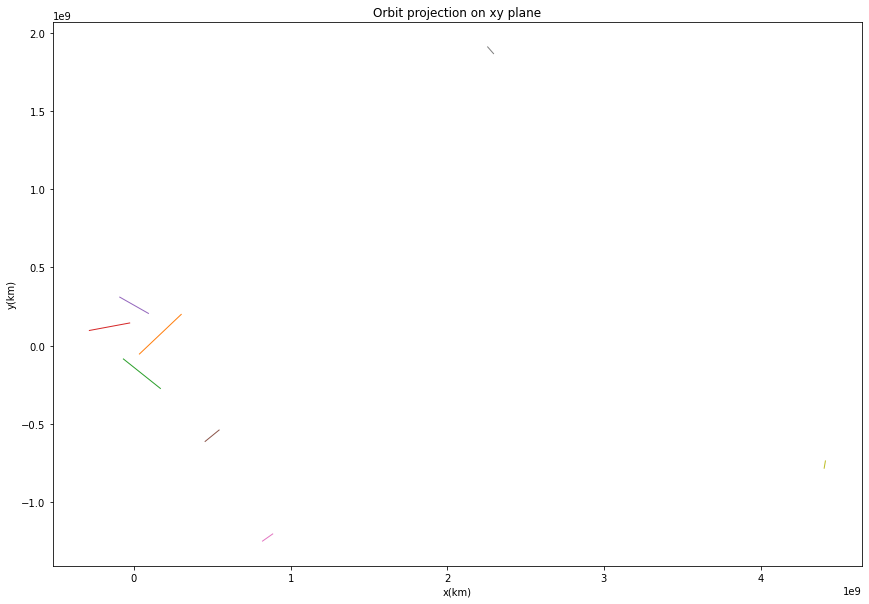

In [38]:

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot()


 
for i in range(N):
    ax.plot(Xs[:,i,0],Xs[:,i,1],linewidth = 1)

ax.set(title = 'Orbit projection on xy plane', xlabel = 'x(km)',ylabel = 'y(km)')
ax.set_aspect('equal')


In [21]:
Vs[step][:][0]

array([-1023.22911909,  -862.04007387,    32.2970824 ])

In [50]:
def acc(pos, step):
    a = np.zeros((N,3))
    ax = 0
    for i in range(N):
        x,y,z = pos[i]
        for l in range(N):
            for dim in range(3):
                if l!=i:
                    r =((x-Xs[step][l][0])**2 + (y-Xs[step][l][1])**2 + (z-Xs[step][l][2])**2)**0.5
                    ax += -G*Ms[l]*(x-Xs[step][l][0])/r**3
                    a[i][dim] = ax
    return a

In [64]:
Xs = np.zeros((steps, N, 3))
Vs = np.zeros((steps, N, 3))
ts = np.linspace(ti,tf,steps)

Xs[0] = [[-995114.977680456, 8.98124266329700E+05,1.58229931598423E+04],
        [3.44615441391852E+07 ,-5.26557638532672E+07,-7.61286267143204E+06],
        [-6.77779938168010E+07,-8.43597394901336E+07,2.69958030976802E+06],
        [-2.77904903569589E+07,1.45531279592339E+08,8.81421672415733E+03],
        [9.18866271313871E+07,2.06696061841096E+08,2.05002398237805E+06],
        [4.54003785963550E+08,-6.10682430690077E+08,-7.62390632497143E+06],
        [8.20351176602562E+08,-1.24706574543561E+09,-1.09761808144217E+07],
        [2.29533745289993E+09,1.86512722528805E+09,-2.28093347838273E+07],
        [4.40623682311692E+09,-7.81771702943420E+08,-8.54471655924357E+07]]

Vs[0] = [[-1.02322911909127E+03,-8.62040073870347E+02,3.22970824014921E+01],
        [2.66853110932131E+06,2.52863729277372E+06,-3.81479438257272E+04],
        [2.35980800402788E+06,-1.88090247751281E+06,-1.62002003392357E+05],
        [-2.57276934940778E+06,-4.78827962928565E+05,-7.40263589142244E+00],
        [-1.82981597359163E+06,1.03827381243802E+06,6.66708767010003E+04],
        [8.91855173066660E+05,7.26974788682208E+05,-2.29741878167567E+04],
        [6.50758615732736E+05,4.56696587751460E+05,-3.39034493618639E+04],
        [-3.75348244065152E+05,4.29216592436392E+05,6.45229544743987E+03],
        [7.88686712937182E+04,4.65184720928017E+05,-1.13436707185877E+04]]



for step in range(1,steps):
    temp = Xs[step-1]
#     for dim in range(3):
    Vs[step][:] = Vs[step-1][:]*acc(Xs[step][:], step-1)*h/2
    Xs[step][:] = Xs[step-1][:]*Vs[step][:]*h
    Vs[step][:] = Vs[step][:]*acc(Xs[step][:], step)*h/2

<ipython-input-50-ad92e0ee7904>:10: RuntimeWarning: divide by zero encountered in double_scalars
  ax += -G*Ms[l]*(x-Xs[step][l][0])/r**3
<ipython-input-50-ad92e0ee7904>:10: RuntimeWarning: invalid value encountered in double_scalars
  ax += -G*Ms[l]*(x-Xs[step][l][0])/r**3
<ipython-input-50-ad92e0ee7904>:9: RuntimeWarning: invalid value encountered in double_scalars
  r =((x-Xs[step][l][0])**2 + (y-Xs[step][l][1])**2 + (z-Xs[step][l][2])**2)**0.5


In [65]:
Vs[step][:]

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

In [66]:
Xs

array([[[-9.95114978e+05,  8.98124266e+05,  1.58229932e+04],
        [ 3.44615441e+07, -5.26557639e+07, -7.61286267e+06],
        [-6.77779938e+07, -8.43597395e+07,  2.69958031e+06],
        ...,
        [ 8.20351177e+08, -1.24706575e+09, -1.09761808e+07],
        [ 2.29533745e+09,  1.86512723e+09, -2.28093348e+07],
        [ 4.40623682e+09, -7.81771703e+08, -8.54471656e+07]],

       [[ 9.60744012e-19, -7.31170889e-19,  4.83058863e-22],
        [-3.86740372e-05,  5.59944474e-05, -1.22132610e-07],
        [ 1.34526512e-04, -1.33457816e-04,  3.67840158e-07],
        ...,
        [-1.34704930e-03,  1.43707977e-03, -9.38985525e-07],
        [ 2.53624661e-03, -2.35665230e-03,  4.33248845e-07],
        [-1.16916244e-03,  1.22351102e-03, -3.26102229e-06]],

       [[-3.02114809e-47,  1.96739368e-47,  4.94555654e-52],
        [ 3.00798840e+17, -4.12682319e+17, -1.35796043e+13],
        [-3.10479261e+18, -2.45503857e+18,  5.82810733e+14],
        ...,
        [ 1.09242410e+20, -8.17893810e+19,